## EIG Stats

In [1]:
from battleship.agents import EIGCalculator, Question, Board
from battleship.spotters import create_spotter
import pandas as pd
from tqdm import tqdm
import os 
# Load the CSV into a DataFrame
stage_csv_path = '/home/ubuntu/new_battleship/battleship/experiments/collaborative/battleship-final-data/stage.csv'
round_csv_path = '/home/ubuntu/new_battleship/battleship/experiments/collaborative/battleship-final-data/round.csv'
stage_df = pd.read_csv(stage_csv_path)
round_df = pd.read_csv(round_csv_path)

# Merge stage_df and round_df on stage_df['roundID'] == round_df['id']

merged_df = pd.merge(stage_df, round_df, left_on='roundID', right_on='id', how='inner')

question_rows = merged_df[merged_df['messageType'] == 'question']
questions = question_rows['messageText'].tolist()
occ_tiles = question_rows['occTiles_y'].tolist()
boards = question_rows['board_id'].tolist()

for idx in tqdm(range(len(questions[:75]))):
    os.environ["OPENROUTER_API_KEY"] = "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"
    spotter = create_spotter(spotter_type="CodeSpotterModel", board_id=boards[idx], board_experiment="collaborative", llm="gpt-4.1-mini", use_cot=True)

    print(f"Question {idx + 1}: {questions[idx]}")
    print(f"Board State {idx + 1}: {occ_tiles[idx]}")
    # Process question
    question = Question(text=questions[idx])
    result = spotter.answer(
        question,
        board=Board.from_occ_tiles(occ_tiles[idx]),
        history=None,
    )

    # Calculate EIG if we have a code question
    eig_value = None
    if result is not None and result.code_question:
        try:
            calculator = EIGCalculator(seed=0)
            eig_value = calculator(
                result.code_question, Board.from_occ_tiles(occ_tiles[idx])
            )
            print(eig_value)
        except Exception as e:
            print(f"Failed to calculate EIG: {e}")

  0%|          | 0/75 [00:00<?, ?it/s]

Question 1: Is there now 2 ships that are fully sunk
Board State 1: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  1%|▏         | 1/75 [00:07<09:08,  7.41s/it]

0
Question 2: Is the final ship below G
Board State 2: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  3%|▎         | 2/75 [00:20<12:48, 10.52s/it]

0
Question 3: Is it below e
Board State 3: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  4%|▍         | 3/75 [00:26<10:24,  8.67s/it]

0
Question 4: Is there a horizantal ship on G or H
Board State 4: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  5%|▌         | 4/75 [00:31<08:38,  7.30s/it]

0
Question 5: is there a ship longer than 3 tiles
Board State 5: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  7%|▋         | 5/75 [00:39<08:49,  7.56s/it]

0
Question 6: Is it above c
Board State 6: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  8%|▊         | 6/75 [00:46<08:27,  7.35s/it]

0.6437935214851027
Question 7: is there a ship at most 1 tile away from E7
Board State 7: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


  9%|▉         | 7/75 [00:54<08:31,  7.52s/it]

0
Question 8: Is the a horizantal dhip after G5 OR H5
Board State 8: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


 11%|█         | 8/75 [01:02<08:37,  7.73s/it]

0
Question 9: Is there a ship above all h=water that I have hit meaing above C5
Board State 9: [[-1,-1,-1,-1,-1,0,-1,-1],[-1,0,2,-1,-1,-1,0,-1],[0,3,2,-1,0,-1,-1,4],[0,3,2,-1,0,-1,0,4],[-1,0,2,0,-1,0,0,0],[0,-1,0,-1,0,-1,0,-1],[1,1,1,1,1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1]]


 11%|█         | 8/75 [01:07<09:27,  8.47s/it]


KeyboardInterrupt: 

In [ ]:
import os
import json
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

RUN_ID = 'run_combined'

# Path to search for captain.json files
base_path = f'/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/'

# Find all captain.json files in subdirectories
captain_files = glob.glob(os.path.join(base_path, '**/captain/captain.json'), recursive=True)

# Dictionary to store eig values by file
eig_values_by_file = {}
# Initialize list to store data for DataFrame
eig_data_list = []

# Extract eig values from each file
for file_path in captain_files:
    # Get relative path for naming
    rel_path = os.path.relpath(file_path, base_path)
    
    # Extract round_id from path
    round_id = rel_path.split('/')[0].split('_')[1]
    
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
            
        # Extract eig values, skipping None/null values
        for idx, datum in enumerate(data):
            if 'eig' in datum and datum['eig'] is not None and 'question' in datum and datum['question'] is not None:
                question_text = datum['question']['question']['text'] if datum['question']['question'] and 'text' in datum['question']['question'] else "No question text"
                eig_value = datum['eig']
                
                eig_questions = datum.get("eig_questions", [])

                if len(eig_questions) != 0:
                    eig_questions = [(q['question']['question']['text'],q['eig'], None) for q in eig_questions]
                    max_eig = max([eq[1] for eq in eig_questions if eq[1] is not None])
                    eig_questions = [(q[0], q[1], q[1] == max_eig) for q in eig_questions]

                # Add to data list
                eig_data_list.append({
                    'round_id': round_id,
                    'question_idx': idx,
                    'question': question_text,
                    'eig': eig_value,
                    'eig_questions': eig_questions,
                })
                
    except (json.JSONDecodeError, FileNotFoundError, KeyError, TypeError) as e:
        print(f"Error processing {file_path}: {e}")

# Create DataFrame from the list
eig_df = pd.DataFrame(eig_data_list)

# Also maintain the old dictionary for backward compatibility
for file_path in captain_files:
    rel_path = os.path.relpath(file_path, base_path)
    round_specific_eigs = eig_df[eig_df['round_id'] == rel_path.split('/')[0].split('_')[1]]['eig'].tolist()
    if round_specific_eigs:
        eig_values_by_file[rel_path] = round_specific_eigs

In [ ]:
eig_df

""


In [ ]:
# Create a new dataframe where each row contains a round_id and a question from eig_questions
expanded_df = []

for _, row in eig_df.iterrows():
    # Only process rows that have eig_questions
    if row['eig_questions'] and len(row['eig_questions']) > 0:
        for question, eig_value, is_max in row['eig_questions']:
            expanded_df.append({
                'round_id': row['round_id'],
                'parent_question': row['question'],
                'parent_eig': row['eig'],
                'candidate_question': question,
                'candidate_eig': eig_value,
                'is_max_eig': is_max
            })

# Create the dataframe
eig_questions_df = pd.DataFrame(expanded_df)

# Display the first few rows
eig_questions_df

# Merge with df_combined to get captain_type for each question
enriched_df = pd.merge(
    eig_questions_df, 
    df_combined[['round_id', 'captain_type', 'board_id']], 
    on='round_id', 
    how='inner'
)

# Create a scatter plot of candidate EIG values
plt.figure(figsize=(15, 8))

# Get unique round_ids and create a mapping to x-coordinates
unique_rounds = enriched_df['round_id'].unique()
round_to_x = {round_id: i for i, round_id in enumerate(unique_rounds)}

# Add slight random jitter to x positions to avoid overplotting
np.random.seed(42)  # For reproducibility
x_jitter = np.random.uniform(-0.1, 0.1, len(enriched_df))

# Plot non-max points
non_max = enriched_df[~enriched_df['is_max_eig']]
plt.scatter([round_to_x[r] + j for r, j in zip(non_max['round_id'], x_jitter[:len(non_max)])], 
            non_max['candidate_eig'], 
            color='red', alpha=0.6, s=30, label='Alternative Questions')

# Plot max points
max_points = enriched_df[enriched_df['is_max_eig']]
max_points = max_points[max_points['candidate_eig'] <= 1]  # Filter out EIG > 1
plt.scatter([round_to_x[r] + j for r, j in zip(max_points['round_id'], x_jitter[len(non_max):len(non_max)+len(max_points)])], 
            max_points['candidate_eig'], 
            color='green', marker='*', s=200, label='Selected Questions (Max EIG)')

# Add labels and title
plt.xlabel('Round ID')
plt.ylabel('Expected Information Gain (EIG)')
plt.title('EIG Values of Candidate Questions by Round')
plt.grid(True, alpha=0.3)
plt.xticks([i for i in range(len(unique_rounds))], unique_rounds, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Display summary statistics
print(f"Total candidate questions: {len(enriched_df)}")
print(f"Number of selected questions (max EIG): {len(max_points)}")
print(f"Average EIG of selected questions: {max_points['candidate_eig'].mean():.4f}")
print(f"Average EIG of alternative questions: {non_max['candidate_eig'].mean():.4f}")


NameError: name 'df_combined' is not defined

In [ ]:

# Function to find and process result files
def process_result_files():
    # Construct path to results directory
    results_path = f'/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/{RUN_ID}/results/'
    
    # Find all result JSON files
    result_files = glob.glob(os.path.join(results_path, '*.json'))
    
    # List to store results
    results_data = []
    
    # Process each result file
    for file_path in result_files:
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                
                # Each file might contain a list of results
                for item in data:
                    results_data.append(item)
        except (json.JSONDecodeError, FileNotFoundError) as e:
            print(f"Error processing {file_path}: {e}")
    
    # Create DataFrame
    df_results = pd.DataFrame(results_data)
    
    # Extract round_id from file names in eig_values_by_file
    eig_data = []
    for file_name in eig_values_by_file:
        # Extract round_id from the path (format: round_XXXXXXXX/captain/captain.json)
        round_id = file_name.split('/')[0].split('_')[1]
        
        # Calculate statistics for EIG values
        values = eig_values_by_file[file_name]
        eig_data.append({
            'round_id': round_id,
            'eig_count': len(values),
            'eig_min': min(values),
            'eig_max': max(values),
            'eig_avg': sum(values)/len(values),
            'eig_median': np.median(values)
        })
    
    # Create DataFrame with EIG statistics
    df_eig = pd.DataFrame(eig_data)
    
    # Merge the results and EIG DataFrames on round_id
    df_combined = pd.merge(df_results, df_eig, on='round_id', how='left')
    
    return df_combined

# Process the result files and create DataFrame
df_combined = process_result_files()

# Display the combined DataFrame
print(f"Combined DataFrame shape: {df_combined.shape}")
df_combined

Combined DataFrame shape: (111, 17)


,captain_type,spotter_type,round_id,board_id,seed,hits,misses,is_won,question_count,precision,recall,f1_score,eig_count,eig_min,eig_max,eig_avg,eig_median
0,LLMDecisionCaptain_cot,Spotter,0d18eff5,B02,42,11,29,False,15,0.275000,0.916667,0.423077,15.0,0.277840,0.985815,0.702202,0.723924
1,LLMDecisionCaptain_cot,Spotter,b7bc1f5c,B05,42,15,8,True,15,0.652174,1.000000,0.789474,15.0,0.067222,0.984569,0.577718,0.562898
2,LLMDecisionCaptain,Spotter,efecb01d,B12,42,9,14,True,15,0.391304,1.000000,0.562500,15.0,0.112361,0.995144,0.728560,0.831240
3,EIGCaptain,Spotter,ad50cabf,B06,42,10,10,True,15,0.500000,1.000000,0.666667,15.0,0.967332,0.999997,0.990146,0.996257
4,LLMDecisionCaptain,Spotter,f4eb0ac4,B02,42,12,19,True,15,0.387097,1.000000,0.558140,15.0,0.037622,0.999261,0.568966,0.568307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,EIGCaptain_cot,Spotter,a6aa601c,B15,42,11,3,True,15,0.785714,1.000000,0.880000,15.0,0.936719,0.999988,0.987668,0.995829
107,EIGCaptain_cot,Spotter,07ddfe67,B05,42,15,9,True,15,0.625000,1.000000,0.769231,15.0,0.671248,0.999997,0.964178,0.998337
108,EIGCaptain_cot,Spotter,053ffe7b,B07,42,11,3,True,15,0.785714,1.000000,0.880000,15.0,0.962170,0.999997,0.986061,0.988880
109,RandomCaptain,Spotter,f88fa1af,B17,42,8,32,False,0,0.200000,0.615385,0.301887,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge eig_df with df_combined to get captain_type for each question
merged_df = pd.merge(eig_df, df_combined[['round_id', 'captain_type', 'board_id']], on='round_id', how='inner')

# Sort the dataframe by captain_type and round_id for better organization
merged_df = merged_df.sort_values(by=['captain_type', 'round_id', 'question_idx'])

# Display the first few rows to verify the merge
print(f"Merged DataFrame shape: {merged_df.shape}")
merged_df

Merged DataFrame shape: (1125, 6)


,round_id,question_idx,question,eig,captain_type,board_id
615,16ba12ee,1,Are there more ship tiles in columns 1–4 than ...,0.987394,EIGCaptain,B16
616,16ba12ee,3,Is the Red ship oriented vertically?,0.999988,EIGCaptain,B16
617,16ba12ee,5,Are there more ship tiles in rows A–D than in ...,0.997225,EIGCaptain,B16
618,16ba12ee,7,Is the green ship oriented vertically?,0.999512,EIGCaptain,B16
619,16ba12ee,9,Is the Orange ship oriented vertically?,0.999711,EIGCaptain,B16
...,...,...,...,...,...,...
1075,e380c4e9,21,Is exactly one of the Green and Purple ships l...,0.999997,MAPEIGCaptain,B08
1076,e380c4e9,23,Is the Green ship located in rows A–D?,0.971533,MAPEIGCaptain,B08
1077,e380c4e9,25,Is the Orange ship located in rows E–F XOR is ...,0.999896,MAPEIGCaptain,B08
1078,e380c4e9,27,Is the Orange ship located in rows E–F?,0.993886,MAPEIGCaptain,B08


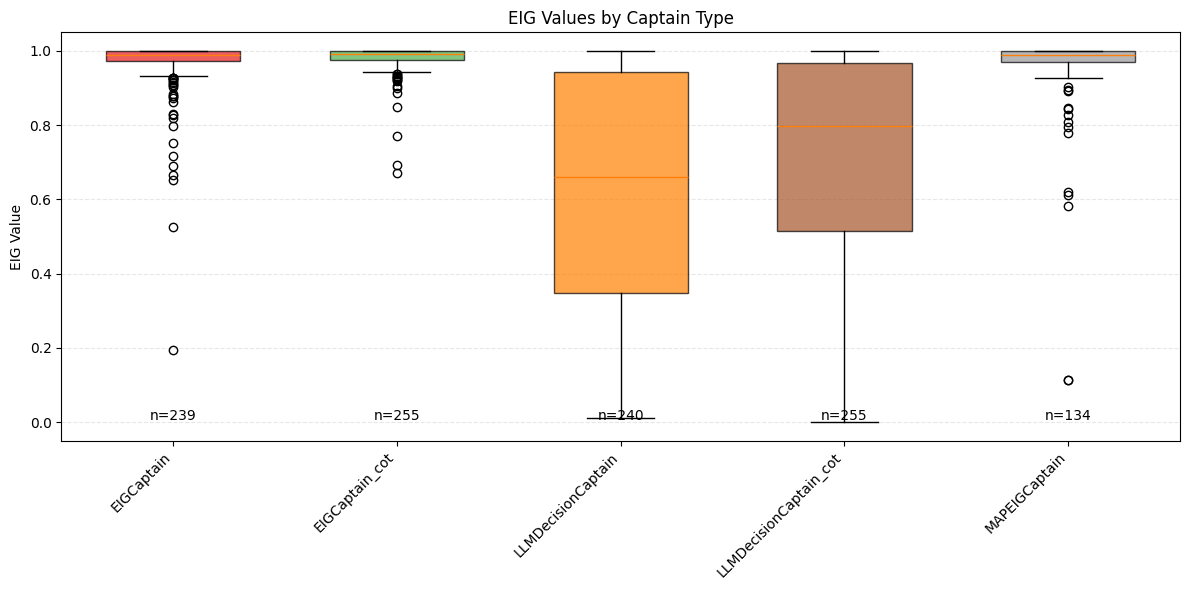

In [ ]:
# Create a boxplot of EIG values divided by captain type
plt.figure(figsize=(12, 6))

# Filter out any remaining EIG values over 1 (additional safety check)
filtered_merged_df = merged_df[merged_df['eig'] <= 1]

# Get all unique captain types from filtered data
captain_types = filtered_merged_df['captain_type'].unique()
n_types = len(captain_types)

# Prepare data for boxplot
box_data = []
colors = plt.cm.Set1(np.linspace(0, 1, n_types))  # Generate colors for each captain type

for captain_type in captain_types:
    captain_data = filtered_merged_df[filtered_merged_df['captain_type'] == captain_type]['eig']
    box_data.append(captain_data)

# Create boxplot
box = plt.boxplot(box_data, positions=range(n_types), widths=0.6, patch_artist=True)

# Color the boxes
for i, (patch, color) in enumerate(zip(box['boxes'], colors)):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize plot
plt.ylabel('EIG Value')
plt.title('EIG Values by Captain Type')
plt.xticks(range(n_types), captain_types, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add sample size information
for i, captain_type in enumerate(captain_types):
    n_samples = len(filtered_merged_df[filtered_merged_df['captain_type'] == captain_type])
    plt.text(i, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), 
             f'n={n_samples}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Precision/Recall Stats

In [2]:
from battleship.run_captain_benchmarks import rebuild_captain_summary_from_results
import pandas as pd
import numpy as np

In [30]:
import os
import ast

# Load the CSV file containing round data

# Define the path to the CSV file
csv_path = '/home/ubuntu/new_battleship/battleship/experiments/collaborative/battleship-final-data/round.csv'
round_df = pd.read_csv(csv_path)
# Ensure occTiles and trueTiles are parsed as lists of lists if they are stored as strings

def parse_tiles(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception:
            return []
    return val

round_df['occTiles'] = round_df['occTiles'].apply(parse_tiles)
round_df['trueTiles'] = round_df['trueTiles'].apply(parse_tiles)

def count_revealed_and_total(occ_tiles, true_tiles):
    # Flatten the lists in case they are 2D
    occ_flat = [item for sublist in occ_tiles for item in sublist] if occ_tiles else []
    true_flat = [item for sublist in true_tiles for item in sublist] if true_tiles else []
    # Total revealed: count of values in occTiles that are not -1
    total_revealed = sum(1 for v in occ_flat if v != -1)
    # True tiles: indices where trueTiles is not 0
    true_indices = set(i for i, v in enumerate(true_flat) if v != 0)
    # Revealed true tiles: those indices where occTiles is not -1 and trueTiles is not 0
    revealed_true = sum(1 for i in true_indices if i < len(occ_flat) and occ_flat[i] != -1)
    return pd.Series({'total_revealed': total_revealed, 'revealed_true': revealed_true, 'true_indices': true_indices})

round_df[['total_revealed', 'revealed_true', 'true_indices']] = round_df.apply(
    lambda row: count_revealed_and_total(row['occTiles'], row['trueTiles']), axis=1
)

round_df = round_df.assign(
    captain_type='human',
    spotter_type='human',
    round_id=round_df['id'],
    seed='human',
    hits=round_df['revealed_true'],
    misses=round_df['total_revealed'] - round_df['revealed_true'],
    question_count=None,
    precision=lambda df: round_df['revealed_true'] / round_df['total_revealed'],
    recall=lambda df: round_df['revealed_true'] / round_df['true_indices'].apply(len),
    f1_score=lambda df: 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall']).replace(0, np.nan),
    is_won=lambda df: df['recall'] == 1,
    llm='human'
)[[
    'captain_type', 'spotter_type', 'round_id', 'board_id', 'seed', 'hits', 
    'misses', 'is_won', 'question_count', 'precision', 'recall', 'f1_score', "llm"
]]

round_df

,captain_type,spotter_type,round_id,board_id,seed,hits,misses,is_won,question_count,precision,recall,f1_score,llm
0,human,human,01JDMZVSGBA3PJBC5AY3SB613R,B03,human,13,17,True,None,0.433333,1.0,0.604651,human
1,human,human,01JDN0VKDN87TVWWHBYDJBY8NR,B16,human,18,11,True,None,0.620690,1.0,0.765957,human
2,human,human,01JDN1QKG7D7E8AEDEMJBX4758,B10,human,9,22,True,None,0.290323,1.0,0.450000,human
3,human,human,01JDN2F3NG0TPHBF7CQ4BSEJZ5,B14,human,15,17,True,None,0.468750,1.0,0.638298,human
4,human,human,01JDN32SA1YJMXY3MYS8TRHFEF,B02,human,12,9,True,None,0.571429,1.0,0.727273,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,human,human,01JJZ4GATW03WJS39WVN0S87EY,B17,human,13,9,True,None,0.590909,1.0,0.742857,human
122,human,human,01JJZ4PE7A3F1K85AZ7SK4AKBS,B04,human,13,18,True,None,0.419355,1.0,0.590909,human
123,human,human,01JJZ4ZY4T4E01TV5H8BAAPAF3,B16,human,18,18,True,None,0.500000,1.0,0.666667,human
124,human,human,01JJZ58JHCAYV885N5T0TD9MW7,B06,human,10,27,True,None,0.270270,1.0,0.425532,human


In [31]:
# Filter rows with 'human' captain_type
human_df = round_df[round_df['captain_type'] == 'human']

# # Calculate the percentile of f1_score for 'human' captain_type
# lower_percentile = 0
# upper_percentile = 100

# lower_threshold = human_df['f1_score'].quantile(lower_percentile / 100)
# upper_threshold = human_df['f1_score'].quantile(upper_percentile / 100)

# filtered_df = human_df[(human_df['f1_score'] >= lower_threshold) & (human_df['f1_score'] <= upper_threshold)]

# elite_round_df = filtered_df

# # Display the resulting DataFrame
# elite_round_df

In [32]:
data_paths = [
    ("llama_4_scout",'/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_llama_4_scout_combined'),
    ("4o",'/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_4o'),
    ("o4-mini",'/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_o4-mini')
]

dfs = []
for name, path in data_paths:
    df = pd.DataFrame(rebuild_captain_summary_from_results(path))
    df['llm'] = name
    dfs.append(df)

#summary = rebuild_captain_summary_from_results("/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_llama_4_scout_combined")
#summary = rebuild_captain_summary_from_results("/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_4o")
#summary = rebuild_captain_summary_from_results("/home/ubuntu/new_battleship/battleship/experiments/collaborative/captain_benchmarks/combined/run_o4-mini")

summary_df = pd.concat(dfs, ignore_index=True)
summary_df

,captain_type,spotter_type,round_id,board_id,seed,hits,misses,is_won,question_count,precision,recall,f1_score,llm
0,LLMDecisionCaptain_cot,Spotter,e85caa85,B12,1337,6,27,False,15,0.181818,0.666667,0.285714,llama_4_scout
1,LLMDecisionCaptain_cot,Spotter,f63a73e5,B02,42,6,32,False,15,0.157895,0.500000,0.240000,llama_4_scout
2,LLMDecisionCaptain_cot,Spotter,7fa73dde,B05,42,12,24,False,15,0.333333,0.800000,0.470588,llama_4_scout
3,MAPEIGCaptain,Spotter,47b40be1,B03,1337,13,5,True,11,0.722222,1.000000,0.838710,llama_4_scout
4,EIGCaptain_cot,Spotter,d69a0d40,B02,111,5,18,False,15,0.217391,0.416667,0.285714,llama_4_scout
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,LLMDecisionCaptain,Spotter,bc6d220f,B05,111,15,7,True,15,0.681818,1.000000,0.810811,o4-mini
874,RandomCaptain,Spotter,f88fa1af,B17,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
875,RandomCaptain,Spotter,ae2ed473,B04,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
876,EIGCaptain,Spotter,c23bbdd7,B07,111,11,4,True,15,0.733333,1.000000,0.846154,o4-mini


In [33]:
# Align the columns of summary_df with round_df
aligned_summary_df = summary_df[round_df.columns]

# Append summary_df to round_df
combined_df = pd.concat([round_df, aligned_summary_df], ignore_index=True)

# Display the shape of the combined DataFrame
combined_df = combined_df[(combined_df['hits'] + combined_df['misses']) <= 40]
combined_df

,captain_type,spotter_type,round_id,board_id,seed,hits,misses,is_won,question_count,precision,recall,f1_score,llm
0,human,human,01JDMZVSGBA3PJBC5AY3SB613R,B03,human,13,17,True,None,0.433333,1.000000,0.604651,human
1,human,human,01JDN0VKDN87TVWWHBYDJBY8NR,B16,human,18,11,True,None,0.620690,1.000000,0.765957,human
2,human,human,01JDN1QKG7D7E8AEDEMJBX4758,B10,human,9,22,True,None,0.290323,1.000000,0.450000,human
3,human,human,01JDN2F3NG0TPHBF7CQ4BSEJZ5,B14,human,15,17,True,None,0.468750,1.000000,0.638298,human
4,human,human,01JDN32SA1YJMXY3MYS8TRHFEF,B02,human,12,9,True,None,0.571429,1.000000,0.727273,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,LLMDecisionCaptain,Spotter,bc6d220f,B05,111,15,7,True,15,0.681818,1.000000,0.810811,o4-mini
1000,RandomCaptain,Spotter,f88fa1af,B17,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
1001,RandomCaptain,Spotter,ae2ed473,B04,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
1002,EIGCaptain,Spotter,c23bbdd7,B07,111,11,4,True,15,0.733333,1.000000,0.846154,o4-mini


In [34]:
combined_df

,captain_type,spotter_type,round_id,board_id,seed,hits,misses,is_won,question_count,precision,recall,f1_score,llm
0,human,human,01JDMZVSGBA3PJBC5AY3SB613R,B03,human,13,17,True,None,0.433333,1.000000,0.604651,human
1,human,human,01JDN0VKDN87TVWWHBYDJBY8NR,B16,human,18,11,True,None,0.620690,1.000000,0.765957,human
2,human,human,01JDN1QKG7D7E8AEDEMJBX4758,B10,human,9,22,True,None,0.290323,1.000000,0.450000,human
3,human,human,01JDN2F3NG0TPHBF7CQ4BSEJZ5,B14,human,15,17,True,None,0.468750,1.000000,0.638298,human
4,human,human,01JDN32SA1YJMXY3MYS8TRHFEF,B02,human,12,9,True,None,0.571429,1.000000,0.727273,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,LLMDecisionCaptain,Spotter,bc6d220f,B05,111,15,7,True,15,0.681818,1.000000,0.810811,o4-mini
1000,RandomCaptain,Spotter,f88fa1af,B17,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
1001,RandomCaptain,Spotter,ae2ed473,B04,42,8,32,False,0,0.200000,0.615385,0.301887,o4-mini
1002,EIGCaptain,Spotter,c23bbdd7,B07,111,11,4,True,15,0.733333,1.000000,0.846154,o4-mini


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'human'),
  Text(1, 0, 'LLMDecisionCaptain_cot'),
  Text(2, 0, 'MAPEIGCaptain'),
  Text(3, 0, 'EIGCaptain_cot'),
  Text(4, 0, 'LLMDecisionCaptain'),
  Text(5, 0, 'MAPEIGCaptain_cot'),
  Text(6, 0, 'EIGCaptain'),
  Text(7, 0, 'RandomCaptain'),
  Text(8, 0, 'MAPCaptain')])

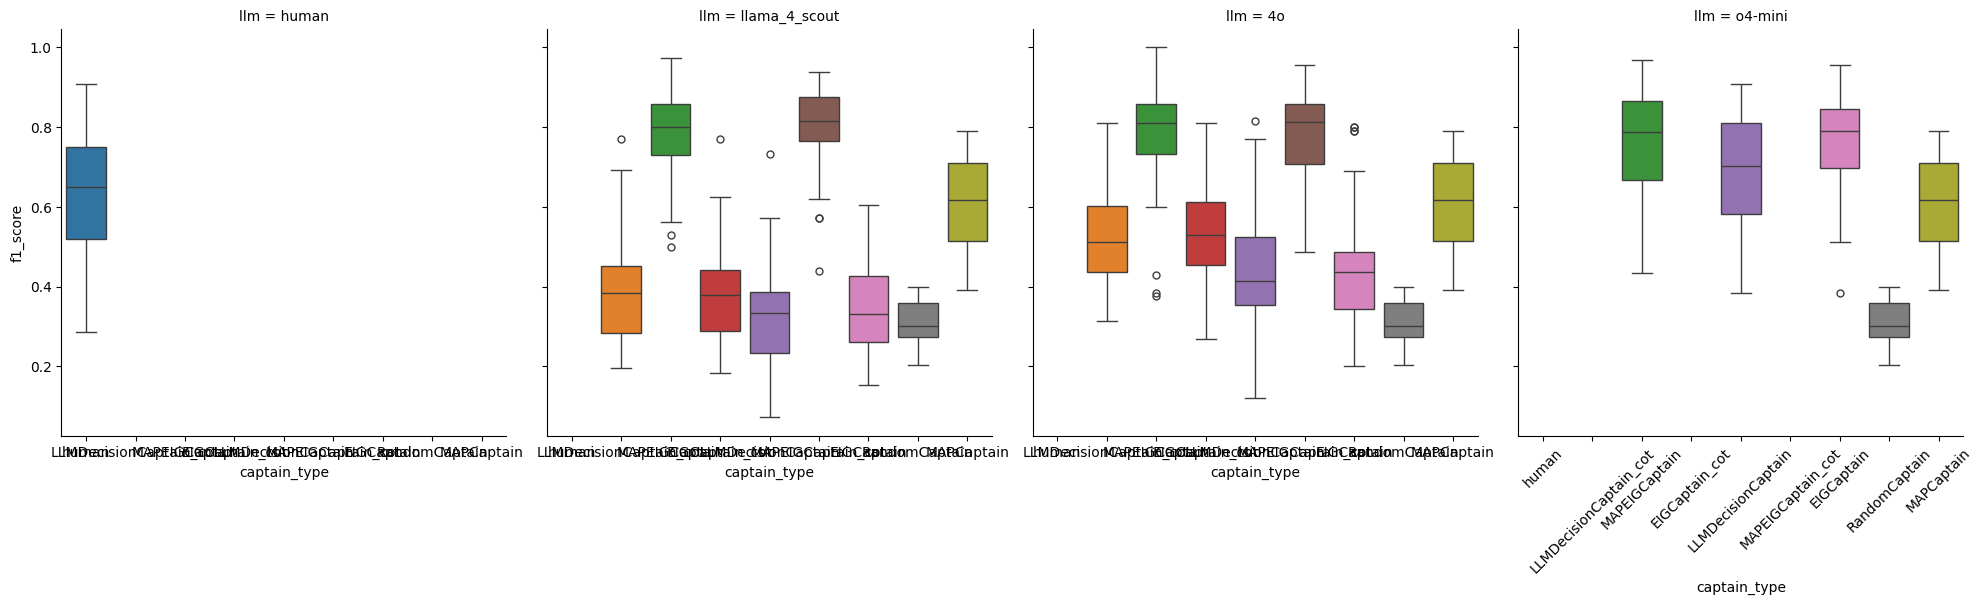

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=combined_df, kind="box", col="llm", x="captain_type", y="f1_score", hue="captain_type")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'EIGCaptain'),
  Text(1, 0, 'LLMDecisionCaptain'),
  Text(2, 0, 'MAPCaptain'),
  Text(3, 0, 'MAPEIGCaptain'),
  Text(4, 0, 'RandomCaptain'),
  Text(5, 0, 'human')])

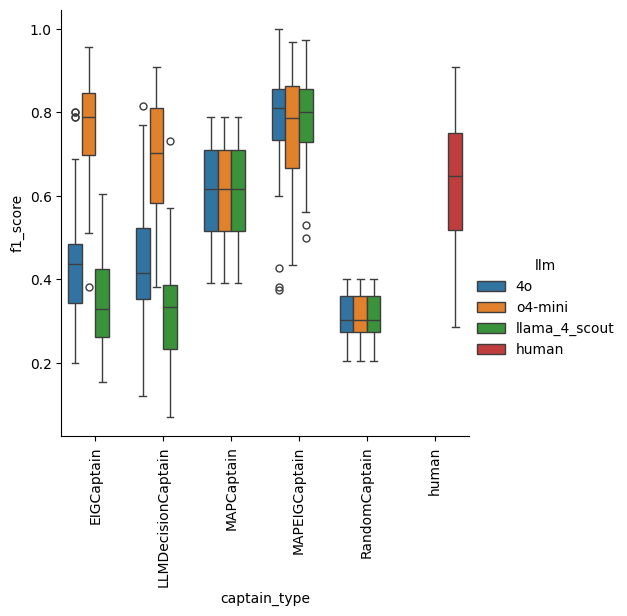

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_df = combined_df.sort_values(by='captain_type', ascending=True)
sorted_df = sorted_df[sorted_df['captain_type'].isin(['human', 'RandomCaptain', 'MAPCaptain','LLMDecisionCaptain', 'EIGCaptain', 'MAPEIGCaptain'])]  

sns.catplot(data=sorted_df, kind="box", x="captain_type", y="f1_score", hue="llm")

plt.xticks(rotation=90)

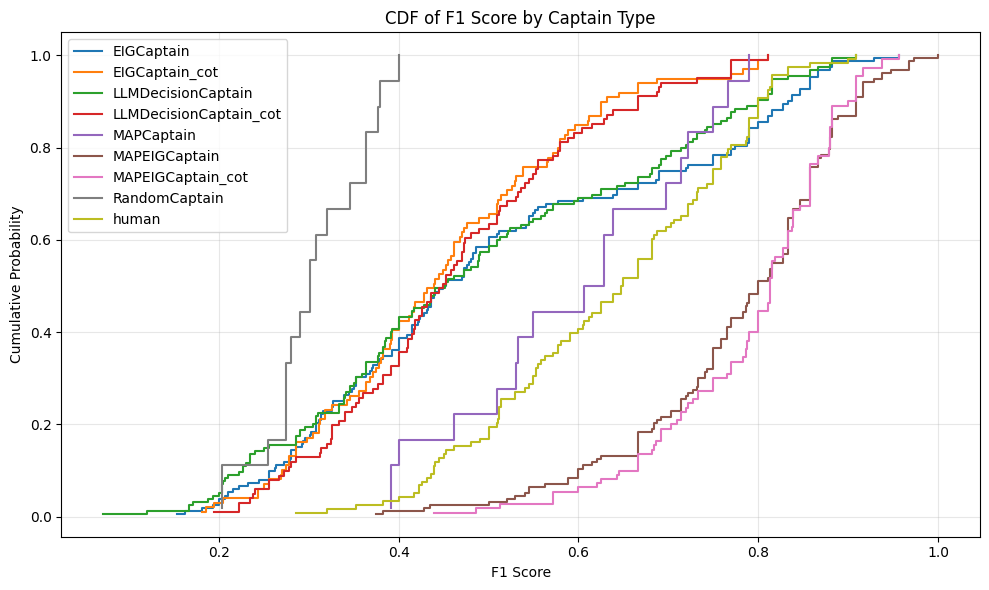

In [36]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for captain_type, group in combined_df.groupby('captain_type'):
    f1_scores = np.sort(group['f1_score'].dropna())
    cdf = np.arange(1, len(f1_scores) + 1) / len(f1_scores)
    plt.step(f1_scores, cdf, where='post', label=captain_type)

plt.xlabel('F1 Score')
plt.ylabel('Cumulative Probability')
plt.title('CDF of F1 Score by Captain Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'human'),
  Text(1, 0, 'LLMDecisionCaptain_cot'),
  Text(2, 0, 'MAPEIGCaptain'),
  Text(3, 0, 'EIGCaptain_cot'),
  Text(4, 0, 'LLMDecisionCaptain'),
  Text(5, 0, 'MAPEIGCaptain_cot'),
  Text(6, 0, 'EIGCaptain'),
  Text(7, 0, 'RandomCaptain'),
  Text(8, 0, 'MAPCaptain')])

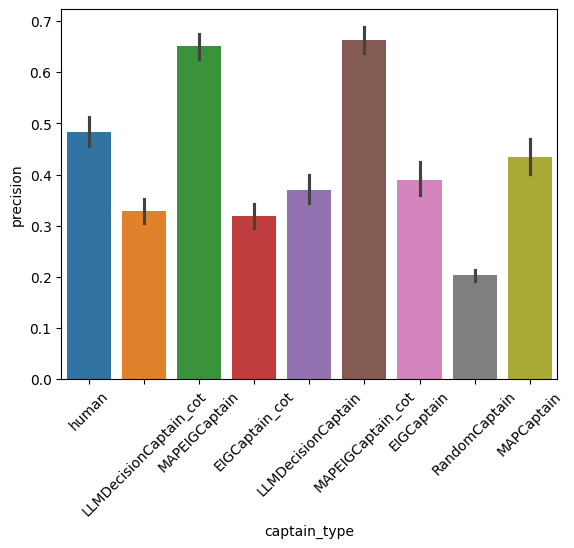

In [37]:
sns.barplot(data=combined_df, x="captain_type", y="precision", hue="captain_type")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'human'),
  Text(1, 0, 'LLMDecisionCaptain_cot'),
  Text(2, 0, 'MAPEIGCaptain'),
  Text(3, 0, 'EIGCaptain_cot'),
  Text(4, 0, 'LLMDecisionCaptain'),
  Text(5, 0, 'MAPEIGCaptain_cot'),
  Text(6, 0, 'EIGCaptain'),
  Text(7, 0, 'RandomCaptain'),
  Text(8, 0, 'MAPCaptain')])

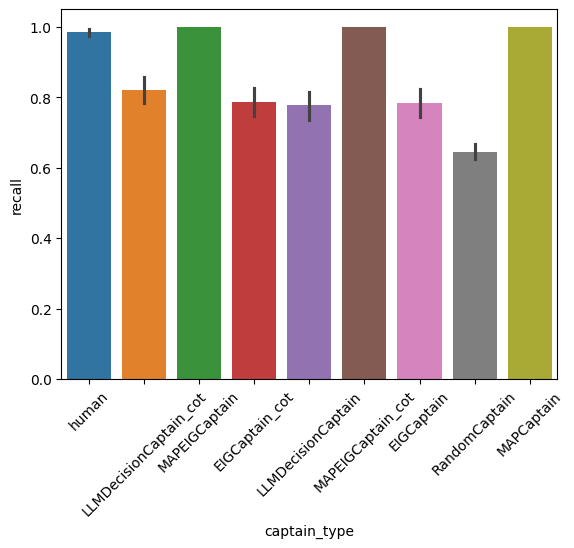

In [38]:
sns.barplot(data=combined_df, x="captain_type", y="recall", hue="captain_type")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'human'),
  Text(1, 0, 'LLMDecisionCaptain_cot'),
  Text(2, 0, 'MAPEIGCaptain'),
  Text(3, 0, 'EIGCaptain_cot'),
  Text(4, 0, 'LLMDecisionCaptain'),
  Text(5, 0, 'MAPEIGCaptain_cot'),
  Text(6, 0, 'EIGCaptain'),
  Text(7, 0, 'RandomCaptain'),
  Text(8, 0, 'MAPCaptain')])

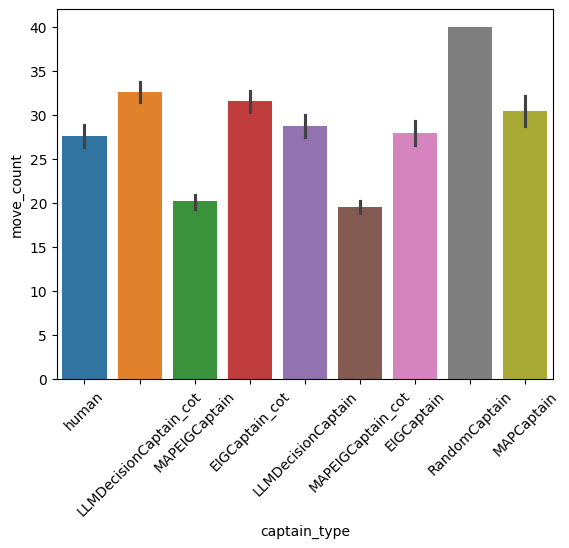

In [39]:
combined_df["move_count"] = combined_df["hits"] + combined_df["misses"]

sns.barplot(data=combined_df, x="captain_type", y="move_count", hue="captain_type")
plt.xticks(rotation=45)